# 第 1 章 初探强化学习

## 1.1 简介

初探强化学习是想帮助理解强化学习的算法原理，提高代码实践能力，更能了解是否开始研究决策智能这个方向。

在机器学习领域，有一类重要的任务和人生选择很相似，即序贯决策（sequential decision making）任务。决策和预测任务不同，决策<font color=red>**往往会带来“后果”**</font>，因此决策者需要为未来负责，在未来的时间点做出进一步的决策。实现序贯决策的机器学习方法就是强化学习（reinforcement learning）。预测仅仅产生一个针对输入数据的信号，并期望它和未来可观测到的信号一致，这不会使未来情况发生任何改变。

本章主要讨论强化学习的基本概念和思维方式；包括了解强化学习在解决什么任务，其基本的数学刻画是什么样的，学习的目标是什么，以及它和预测型的有监督学习方法有什么根本性的区别。

## 1.2 什么是强化学习

广泛地讲，强化学习是机器通过与环境交互来实现目标的一种计算方法。机器和环境的一轮交互是指，机器在环境的一个状态下做一个动作决策，把这个动作作用到环境当中，环境发生相应的改变，并且将相应的奖励反馈和下一轮的状态传回机器。这种交互是迭代进行的，机器的目标是最大化在多轮交互过程中获得的**累积奖励的期望**。强化学习用智能体（agent）这个概念来表示做决策的机器。

> 相比于有监督学习中的“模型”，强化学习中的“智能体”强调机器不但可以感知周围的环境信息，还可以通过做决策来直接改变这个环境，而不只是给出一些预测信号。

智能体和环境之间具体的交互方式如图1-1所示。在每一轮交互中，智能体感知到环境目前所处的状态，经过自身的计算给出本轮的动作，将其作用到环境中；环境得到智能体的动作后，产生相应的即时奖励信号并发生相应的状态转移。智能体则在下一轮交互中感知到新的环境状态，依次类推。

<img src="https://hrl.boyuai.com/static/11.da5ee18f.png" alt="img" style="zoom:50%;" />

​                                                                           图1-1 强化学习中智能体和环境之间的迭代式交互

智能体有3种关键要素，即**感知**、**决策**和**奖励**。

- **感知**。智能体在某种程度上感知环境的状态，从而知道自己所处的现状。例如，下围棋的智能体感知当前的棋盘情况；无人车感知周围道路的车辆、行人和红绿灯等情况；机器狗通过摄像头感知面前的图像，通过脚底的力学传感器来感知地面的摩擦功率和倾斜度等情况。
- **决策。**智能体根据当前的状态计算出达到目标需要采取的动作的过程叫作决策。例如，针对当前的棋盘决定下一颗落子的位置；针对当前的路况，无人车计算出方向盘的角度和刹车、油门的力度；针对当前收集到的视觉和力觉信号，机器狗给出4条腿的齿轮的角速度。策略是智能体最终体现出的智能形式，是不同智能体之间的核心区别。
- **奖励。**环境根据状态和智能体采取的动作，产生一个标量信号作为奖励反馈。这个标量信号衡量智能体这一轮动作的好坏。例如，围棋博弈是否胜利；无人车是否安全、平稳且快速地行驶；机器狗是否在前进而没有摔倒。最大化累积奖励期望是智能体提升策略的目标，也是衡量智能体策略好坏的关键指标。

从以上分析可以看出，面向决策任务的强化学习和面向预测任务的有监督学习在形式上是有不少区别的。

- 首先，决策任务往往涉及多轮交互，即序贯决策；而预测任务总是单轮的独立任务。如果决策也是单轮的，那么它可以转化为“判别最优动作”的预测任务。
- 其次，因为决策任务是多轮的，智能体就需要在每轮做决策时考虑未来环境相应的改变，所以当前轮带来最大奖励反馈的动作，在长期来看并不一定是最优的。

## 1.3 强化学习的环境

我们从1.2节可以看到，强化学习的智能体是在和一个动态环境的交互中完成序贯决策的。我们说一个环境是动态的，意思就是它会随着某些因素的变化而不断演变，这在数学和物理中往往用随机过程来刻画。其实，生活中几乎所有的系统都在进行演变，例如一座城市的交通、一片湖中的生态、一场足球比赛、一个星系等。对于一个随机过程，其最关键的要素就**是状态以及状态转移的条件概率分布**。这就好比一个微粒在水中的布朗运动可以由它的起始位置以及下一刻的位置相对当前位置的条件概率分布来刻画。

如果在环境这样一个自身演变的随机过程中加入一个外来的干扰因素，即智能体的动作，那么环境的下一刻状态的概率分布将由当前状态和智能体的动作来共同决定，用最简单的数学公式表示则是
$$
下一状态 ~ P(.|当前状态,智能体的动作)
$$
根据上式可知，智能体决策的动作作用到环境中，使得环境发生相应的状态改变，而智能体接下来则需要在新的状态下进一步给出决策。

> 小结：与面向决策任务的智能体进行交互的环境是一个**动态的随机过程**，其未来状态的分布由当前状态和智能体决策的动作来共同决定，并且每一轮状态转移都伴随着两方面的随机性：
>
> 一是智能体决策的动作的随机性;
>
> 二是环境基于当前状态和智能体动作来采样下一刻状态的随机性。
>
> 通过对环境的动态随机过程的刻画，可以看出，在**动态随机过程中学习**和在一个固定的数据分布下学习是非常不同的。

## 1.4 强化学习的目标

在上述动态环境下，智能体和环境每次进行交互时，环境会产生相应的奖励信号，其往往由实数标量来表示。这个奖励信号一般是诠释当前状态或动作的好坏的及时反馈信号，好比在玩游戏的过程中某一个操作获得的分数值。整个交互过程的每一轮获得的奖励信号可以进行累加，形成智能体的整体回报（return），好比一盘游戏最后的分数值。根据环境的动态性我们可以知道，即使环境和智能体策略不变，智能体的初始状态也不变，智能体和环境交互产生的结果也很可能是不同的，对应获得的回报也会不同。因此，在强化学习中，我们关注回报的期望，并将其定义为价值（value），这就是强化学习中智能体学习的优化目标。

价值的计算有些复杂，因为需要对交互过程中每一轮智能体采取动作的概率分布和环境相应的状态转移的概率分布做积分运算。强化学习和有监督学习的**学习目标其实是一致的**，即在某个数据分布下优化一个价值(scalar)的期望。不过，经过后面的分析我们会发现，强化学习和有监督学习的**优化途径是不同的**。


## 1.5 强化学习中的数据

本节是从数据层面谈谈有监督学习和强化学习的区别。

有监督学习的任务建立在从给定的数据分布中采样得到的训练数据集上，通过优化在训练数据集中设定的目标函数（如最小化预测误差）来找到模型的最优参数。这里，训练数据集背后的数据分布是完全不变的。

在强化学习中，数据是在智能体与环境交互的过程中得到的。如果智能体不采取某个决策动作，那么该动作对应的数据就永远无法被观测到，所以当前智能体的训练数据来自之前智能体的决策结果。因此，智能体的策略不同，与环境交互所产生的数据分布就不同，如图1-2所示。

<img src="https://hrl.boyuai.com/static/12.683654d1.png" alt="img" style="zoom:50%;" />

<center>图1-2 强化学习中智能体与环境交互产生相应的数据分布</center >

具体而言，强化学习中有一个关于数据分布的概念，叫作**占用度量（occupancy measure）**，其具体的数学定义和性质会在第3章讨论，在这里先简要陈述下：归一化的占用度量用于衡量在一个智能体决策与一个动态环境的交互过程中，采样到一个具体的状态动作对（state-action pair）的概率分布。

占用度量有一个很重要的性质：给定两个策略及其与一个动态环境交互得到的两个占用度量，那么当且仅当这两个占用度量相同时，这两个策略相同。也就是说，如果一个智能体的策略有所改变，那么它和环境交互得到的占用度量也会相应改变。

根据占用度量这一重要的性质，我们可以领悟到强化学习本质的思维方式。

- 强化学习的策略在训练中会不断更新，其对应的数据分布（即占用度量）也会相应地改变。因此，强化学习的一大难点就在于，智能体看到的数据分布是随着智能体的学习而不断发生改变的。
- 由于奖励建立在状态动作对之上，一个策略对应的价值其实就是一个占用度量下对应的奖励的期望，因此**寻找最优策略对应着寻找最优占用度量。**
- 训练的过程中 智能体与环境交互数据集 -> <font color="red">策略提升 </font>  ->  决策动作 -> 收集数据 -> 智能体与环境交互数据集
    - 策略提升是个比较的概念。要想实现策略提升，首先定义策略价值；而要想定义策略价值，先需要对问题进行建模，再将策略价值数值化。问题建模 -> 定义策略价值 -> 策略提升方法

## 1.6 强化学习的独特性

对强化学习的基本数学概念有了一定的了解后，再看看一般的有监督学习和强化学习的区别。

对于一般的有监督学习任务，我们的目标是找到一个最优的模型函数，使其在训练数据集上最小化一个给定的损失函数。在训练数据独立同分布的假设下，这个优化目标表示最小化模型在整个数据分布上的**泛化误差**（generalization error），用简要的公式可以概括为：

$$
{ 最优模型 = \underset {模型} { \operatorname {arg\,min} } \, \mathbb{E}_{(特征，标签)\sim 数据分布} \quad \quad \quad ([损失函数(标签，模型(特征))]. }
$$
相比之下，强化学习任务的最终优化目标是**最大化智能体策略在和动态环境交互过程中的价值**。根据1.5节的分析，策略的价值可以等价转换成奖励函数在策略的占用度量上的期望，即：
$$
 { 最优策略 = \underset {策略} { \operatorname {arg\,min} } \, \mathbb{E}_{(状态，动作)\sim 策略的占用度量} \quad \quad \quad \quad ([奖励函数(状态，动作	)]. }
$$
观察以上两个优化公式，回顾1.4节，总结出两者的相似点和不同点。

- 有监督学习和强化学习的**优化目标相似**，即都是在优化某个数据分布下的一个分数值的期望。
- 二者**优化的途径是不同的**，有监督学习直接通过优化模型对于数据特征的输出来优化目标，即修改目标函数而数据分布不变；强化学习则通过改变策略来调整智能体和环境交互数据的分布，进而优化目标，即修改数据分布而目标函数不变。

综上所述，一般有监督学习和强化学习的范式之间的区别为：

- 一般的有监督学习关注寻找一个模型，使其在给定数据分布下得到的损失函数的期望最小；
- 强化学习关注寻找一个智能体策略，使其在与动态环境交互的过程中产生最优的数据分布，即最大化该分布下一个给定奖励函数的期望。

强化学习不同于机器学习的方面：
1. 强化学习没有supervisor，只有一个reward信号
2. 反馈/奖励是延迟的，not instantaneous
3. 时序决策，non i.i.d 数据
4. agent的动作影响agent后续接收到的数据:观察 + reward


## 1.7 强化学习的中重要的概念

### rewards

### 
## 1.8 强化学习的历史

### AlfaGohe AlfaZero
强化学习的历史记住了3个瞬间
- 李世石在还剩6分多钟的时候的一手棋，此后人类对AlfaGo再无胜绩；
- 柯洁输棋后的眼泪，以及说出的下棋过程中的绝望，虽然仍然不相信机器智能会超过人类，但是这段话还是很有触动的；
- 2017年AlfaZero横空出世后，横扫AlfaGo 100：0。

也记住了两个决定
- AlfaZero抛弃了Haman Knowledge，在围棋界传承了上百年的哲学也迅速产生了很大的改变。
- David在围棋的强化学习领域10年磨一剑的决定。

### 强化学习的理论
补充下理论的发展 标志性的进步是Q-learning -> DQ-Learning

以下给出一个基于gridworld建立的agent-environment交互的例子，理解如何建立环境，agent，以及tabular表示的$Q^*$值。

1. 创建一个在环境中随机选择动作的agent。 
2. 创建一个使用 Q-learning 的agent,初始 Q 值为0、ε-贪婪策略函数的随机参数 ε=0.05，学习率 α=0.1。随意尝试设置这三个参数为其他值。 
3. 绘制两个agent通过episode获得的平均总奖励。这称为学习曲线。t运行足够多的episode，以使得采用Q 学习的agen收敛到接近最优的策略。

#### agent-environment接口
agent与其环境的交互从决策阶段 t=0 开始，观察当前状态 s0。 （请注意，在这个初始阶段没有奖励。）然后代理在决策阶段 t=1 选择要执行的动作。环境通过将其状态更改为 s1 并返回数字奖励信号 r1 来响应。

![The agent-environment interface](images/agent-environment.png)

#### 环境：gridworld中的导航

agent在每个state（方格）有四种可能的行动：西部、北部、南部和东部。动作不靠谱。他们以 0.8 的概率将智能体移动到预期的方向，并以 0.2 的概率将智能体移动到随机的其他方向。如果移动方向受阻，则agent保持在相同的方格中。agent的初始状态是底部的五个网格正方形之一，随机选择。带有金色和炸弹的网格方块是终端状态。如果代理发现自己处于这些方格之一，则episode结束。然后一个新的episode开始于处于初始状态的agent。 使用强化学习算法来计算最佳策略，以尽可能少的步骤找到黄金，同时避免炸弹。为此，我们将使用以下奖励函数：每次导航操作为-1，找到金币额外+10，击中炸弹额外-10。例如，转移到带有金色的正方形的即时奖励 是-1 + 10 = + 9。 不要使用折扣（即设置 γ=1）。

![gridworld中的导航](images/gold.png)



In [11]:
import numpy as np

In [12]:
init_reward = np.array([[0.02, 0.03, 0.04, 0], [0.01, 0, 0.02, 0], [0, 0.01, 0.02, 0]])

In [14]:
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True

In [15]:
class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC
        
    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0
    
    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True
    
    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0]-1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0]+1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1]-1)
            else:
                nxtState = (self.state[0], self.state[1]+1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= 2):
                if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state
    
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')    

In [16]:
s = State()
s.state

(2, 0)

In [17]:
class Agent:
    
    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.isEnd = self.State.isEnd
        self.lr = 0.2
        self.exp_rate = 0.3
        
        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # init_reward[i, j]
    
    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""
        
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
            # print("current pos: {}, greedy aciton: {}".format(self.State.state, action))
        return action
    
    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)     
    
    def reset(self):
        self.states = []
        self.State = State()
        self.isEnd = self.State.isEnd
    
    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr*(reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")
                self.isEnd = self.State.isEnd
    
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]) + ' | '
            print(out)
        print('----------------------------------') 

In [18]:
ag = Agent()

ag.play(50)

current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action right
nxt state (2, 2)
---------------------
current position (2, 2) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action up
nxt state (1, 3)
---------------------
Game End Reward -1
current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action up
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
c

In [19]:
ag.showValues()

----------------------------------
| 0.935 | 0.933 | 0.92 | 1.0 | 
----------------------------------
| 0.889 | 0 | 0.524 | -1.0 | 
----------------------------------
| 0.563 | 0.226 | 0.033 | -0.2 | 
----------------------------------


#### Q-learning
From Sutton & Barto
![Q-learning](images/q-learning.png)

In [13]:
#In this exercise, you will implement the interaction of a reinforecment learning agent with its environment. 
# We will use the gridworld environment https://github.com/michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-/blob/master/Gridworld.ipynb
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

#### Classes for the Enviroment and the Agent

- GridWorld 类包含环境 
- 定义了环境的维度 
- 存储所有奖励的位置 
- 编写不同方法的函数 
    - get_available_actions 返回可能的操作 
    - agent_on_map 打印出代理在网格上的当前位置（用于调试） 
    - get_reward 返回输入位置的奖励 
    - make_step 沿指定方向移动代理


In [3]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 5
        self.width = 5
        self.grid = np.zeros(( self.height, self.width)) - 1
        
        # Set random start location for the agent
        self.current_location = ( 4, np.random.randint(0,5))
        
        # Set locations for the bomb and the gold
        self.bomb_location = (1,3)
        self.gold_location = (0,3)
        self.terminal_states = [ self.bomb_location, self.gold_location]
        
        # Set grid rewards for special cells
        self.grid[ self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid[ self.gold_location[0], self.gold_location[1]] = 10
        
        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
        
    ## Put methods here:
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions
    
    def agent_on_map(self):
        """Prints out current location of the agent on the grid (used for debugging)"""
        grid = np.zeros(( self.height, self.width))
        grid[ self.current_location[0], self.current_location[1]] = 1
        return grid
    
    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]
        
    
    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location
        
        # UP
        if action == 'UP':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        
        # DOWN
        elif action == 'DOWN':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        # LEFT
        elif action == 'LEFT':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
                
        return reward
    
    def check_state(self):
        """Check if the agent is in a terminal state (gold or bomb), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [4]:
class RandomAgent():        
    # Choose a random action
    def choose_action(self, available_actions):
        """Returns a random choice of the available actions"""
        return np.random.choice(available_actions)   

In [5]:
class Q_Agent():
    # Intialise
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict() # Store all Q-values in dictionary of dictionaries 
        for x in range(environment.height): # Loop through all possible grid spaces, create sub-dictionary for each
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0} # Populate sub-dictionary with zero values for possible moves

        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    def choose_action(self, available_actions):
        """Returns the optimal action from Q-Value table. If multiple optimal actions, chooses random choice.
        Will make an exploratory random action dependent on epsilon."""
        if np.random.uniform(0,1) < self.epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    def learn(self, old_state, reward, new_state, action):
        """Updates the Q-value table using Q-learning"""
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)



In [6]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = [] # Initialise performance log
    
    for trial in range(trials): # Run trials
        cumulative_reward = 0 # Initialise values of each game
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL': # If game is in terminal state, game over and start next trial
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log
        
    return reward_per_episode # Return performance log

#### Run Random Agent

- 随机代理随机移动，不会从它的动作中学习。 
- 随机代理是为 Q-Learning 代理提供了基础性能比较


In [7]:
env = GridWorld()
agent = RandomAgent()

print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())

Current position of the agent = (4, 3)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = DOWN
Reward obtained = -1.0
Current position of the agent = (4, 3)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


- Here the random agent is ran for 500 trials
- Performance is obviously inconsistent and not optimal

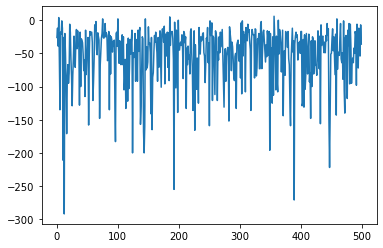

In [8]:
# Initialize environment and agent
environment = GridWorld()
random_agent = RandomAgent()

reward_per_episode = play(environment, random_agent, trials=500)

# Simple learning curve
plt.plot(reward_per_episode)

Q-Agent

- Here the Q-Learning agent is ran for 500 trials again
- Performance is plotted
- Performance increases greatly

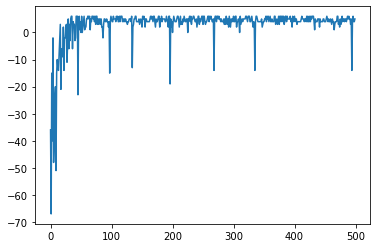

In [9]:
environment = GridWorld()
agentQ = Q_Agent(environment)

# Note the learn=True argument!
reward_per_episode = play(environment, agentQ, trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)

Print the final Q-value table with nice formatting.

In [10]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


pretty(agentQ.q_table)

(0, 0)
	UP
		-0.30000000000000004
	DOWN
		-0.31891
	LEFT
		-0.30000000000000004
	RIGHT
		-0.12409556392245474
(0, 1)
	UP
		-0.2
	DOWN
		-0.1
	LEFT
		-0.1
	RIGHT
		5.708594107080454
(0, 2)
	UP
		5.490232320171997
	DOWN
		0.7999998832820968
	LEFT
		0.707576468240101
	RIGHT
		9.999999999999995
(0, 3)
	UP
		0
	DOWN
		0
	LEFT
		0
	RIGHT
		0
(0, 4)
	UP
		-0.1
	DOWN
		-0.1
	LEFT
		6.5132155990000005
	RIGHT
		-0.1
(1, 0)
	UP
		-0.521949
	DOWN
		-0.5894694879423121
	LEFT
		-0.5000000000000001
	RIGHT
		-0.5433955352751162
(1, 1)
	UP
		0.8554217926205563
	DOWN
		-0.1892996902355513
	LEFT
		-0.30000000000000004
	RIGHT
		-0.281
(1, 2)
	UP
		8.999999999999982
	DOWN
		3.539944932676038
	LEFT
		-0.24526676908008643
	RIGHT
		-6.12579511
(1, 3)
	UP
		0
	DOWN
		0
	LEFT
		0
	RIGHT
		0
(1, 4)
	UP
		1.9528213050900005
	DOWN
		-0.21900000000000003
	LEFT
		-1.0
	RIGHT
		-0.2
(2, 0)
	UP
		-0.9076135278900003
	DOWN
		-0.9350410277504624
	LEFT
		-0.9000000000000004
	RIGHT
		-0.6457304074060486
(2, 1)
	UP
		-0.66

- 
## 1.9 小结

本章通过简短的篇幅，大致介绍了强化学习的样貌，梳理了强化学习和有监督学习在范式以及思维方式上的相似点和不同点。在大多数情况下，强化学习任务往往比一般的有监督学习任务更难，因为一旦策略有所改变，其交互产生的数据分布也会随之改变，并且这样的改变是高度复杂、不可追踪的，往往不能用显式的数学公式刻画。这就好像一个混沌系统，我们无法得到其中一个初始设置对应的最终状态分布，而一般的有监督学习任务并没有这样的混沌效应。

接下来，就要通过理论学习和代码实践来躬身入局强化学习的大门了。